# Oleaster (Eleagnus angustifolia) coverage investigation in the South Heves Grasslands Landscape Protection Area in 2023

## Importing libraries

In [1]:
import geopandas

from src.calculate_statistics import AreaStatisticsComparisonWithSampleArea
from src.utils.file_utils import write_csv_from_dict
from src.utils.file_utils.write_excel import write_excel_sheet_from_dict, write_excel_sheet_from_dataframe

## Setting up the input data

In [2]:
oleasters_basic_data = geopandas.read_file(
    '../data/oleasters_dhte_2023/ezustfa_manual_digit.gpkg',
    layer='ezustfa_manual_digit'
)
sample_area_basic_data = geopandas.read_file(
    '../data/oleasters_dhte_2023/hatasterulet.gpkg',
    layer='hatasterulet_singlepart'
)

## Define Excel file

In [3]:
excel_file = '../results/oleasters_dhte_2023/area_statistics/oleasters.xlsx'

## Get sample area size in $m^2$

In [4]:
ludas_supbparts = sample_area_basic_data[sample_area_basic_data['subpart_name'].str.startswith('tarna')]
rakottyas_subparts = sample_area_basic_data[sample_area_basic_data['subpart_name'].str.startswith('pely')]

subpart_areas = {
    'ludas': ludas_supbparts.geometry.area.sum(),
    'rakottyas': rakottyas_subparts.geometry.area.sum(),
    'sum': ludas_supbparts.geometry.area.sum() + rakottyas_subparts.geometry.area.sum()
}
print('Area sizes')
print(subpart_areas)
write_excel_sheet_from_dict(dictionary=subpart_areas, file_name=excel_file, sheet_name='sub-areas')

Area sizes
{'ludas': 5613195.774895668, 'rakottyas': 1757293.8048941833, 'sum': 7370489.579789851}


## Spatial join the oleaster data with the sample areas

In [5]:
study_area = oleasters_basic_data.sjoin(sample_area_basic_data, how='left', predicate='intersects')

## Remove oleasters outside the study area and remove the unnecessary columns

In [6]:
study_area.dropna(subset=['subpart_name'], inplace=True)
study_area.drop(
    columns=['category', 'area_left', 'estimated_individuals', 'index_right', 'fejlesztes', 'area_right'],
    axis=1,
    inplace=True)
print('Column names of the cleaned base data frame')
print(study_area.columns)
print('Sample data from the base data frame')
print(study_area.head(5))

Column names of the cleaned base data frame
Index(['geometry', 'subpart_name'], dtype='object')
Sample data from the base data frame
                                            geometry      subpart_name
0  POLYGON ((749211.412 242846.276, 749210.122 24...  tarna_ezustfa_02
1  POLYGON ((749206.311 242833.554, 749206.076 24...  tarna_ezustfa_02
2  POLYGON ((749362.769 242714.427, 749369.801 24...  tarna_ezustfa_02
3  POLYGON ((749348.192 242715.456, 749353.851 24...  tarna_ezustfa_02
4  POLYGON ((749374.225 242684.726, 749377.996 24...  tarna_ezustfa_02


## Calculate the area of the oleaster polygons in $m^2$

In [7]:
study_area['area'] = study_area.geometry.area

## Create dataframe for the two separated sample areas

In [8]:
ludas = study_area[study_area['subpart_name'].str.startswith('tarna')]
rakottyas = study_area[study_area['subpart_name'].str.startswith('pely')]
print('Sample data from the data frames separated by sub-areas')
print(ludas.head(5))
print(rakottyas.head(5))

Sample data from the data frames separated by sub-areas
                                            geometry      subpart_name  \
0  POLYGON ((749211.412 242846.276, 749210.122 24...  tarna_ezustfa_02   
1  POLYGON ((749206.311 242833.554, 749206.076 24...  tarna_ezustfa_02   
2  POLYGON ((749362.769 242714.427, 749369.801 24...  tarna_ezustfa_02   
3  POLYGON ((749348.192 242715.456, 749353.851 24...  tarna_ezustfa_02   
4  POLYGON ((749374.225 242684.726, 749377.996 24...  tarna_ezustfa_02   

         area  
0    6.738424  
1   26.876360  
2  226.426230  
3  437.066467  
4   19.900229  
                                             geometry        subpart_name  \
7   POLYGON ((744568.667 244353.825, 744570.899 24...  pely_ezustfa_01-02   
10  POLYGON ((744601.368 244366.737, 744601.641 24...  pely_ezustfa_01-02   
11  POLYGON ((744519.753 244364.027, 744523.214 24...  pely_ezustfa_01-02   
14  POLYGON ((744536.057 244350.728, 744537.970 24...  pely_ezustfa_01-02   
15  POLYGON ((7445

## Calculate statistics

In [9]:
study_area_statistics = AreaStatisticsComparisonWithSampleArea(
    study_area,
    subpart_areas['ludas'] + subpart_areas['rakottyas']
)
ludas_statistics = AreaStatisticsComparisonWithSampleArea(
    ludas,
    subpart_areas['ludas']
)
rakottyas_statistics = AreaStatisticsComparisonWithSampleArea(
    rakottyas,
    subpart_areas['rakottyas']
)
print('Statistics for all sample areas')
print(study_area_statistics.get_area_statistics())
print('Statistics for Ludas sample area')
print(ludas_statistics.get_area_statistics())
print('Statistics for Rakottyas sample area')
print(rakottyas_statistics.get_area_statistics())

Statistics for all sample areas
{'sum': 139301.57289901393, 'count': 1269, 'mean': 109.77271308038922, 'median': 37.40357533628124, 'std': 307.3942775632389, 'minimum': 0.39495606443404835, 'first_quartile': 13.537664095935124, 'second_quartile': 37.40357533628124, 'third_quartile': 92.37866889549393, 'jenks': [215.12704924562556, 782.8658243967652, 2576.215276210259], 'equal_interval': 1421.1997025772728, 'equal_interval_breaks': [1421.594658641707, 2842.7943612189797, 4263.994063796253], 'maximum': 5685.193766373525, 'sample_area_size': 7370489.579789851, 'experimental_area_ratio': 1.889990771861124}
Statistics for Ludas sample area
{'sum': 101315.55848202194, 'count': 831, 'mean': 121.92004630808897, 'median': 38.883300189377984, 'std': 357.5945960268639, 'minimum': 0.5398059108270392, 'first_quartile': 15.71703456440053, 'second_quartile': 38.883300189377984, 'third_quartile': 97.56318703376414, 'jenks': [203.64485151721988, 782.8658243967652, 2576.215276210259], 'equal_interval': 

## Write statistics to csv

In [10]:
write_csv_from_dict(
    study_area_statistics.get_area_statistics(),
    '../results/oleasters_dhte_2023/area_statistics/study_area_statistics.csv'
)
write_csv_from_dict(
    ludas_statistics.get_area_statistics(),
    '../results/oleasters_dhte_2023/area_statistics/ludas_statistics.csv'
)
write_csv_from_dict(
    rakottyas_statistics.get_area_statistics(),
    '../results/oleasters_dhte_2023/area_statistics/rakottyas_statistics.csv'
)

# Write statistics to Excel

In [11]:
write_excel_sheet_from_dataframe(
    study_area_statistics.data,
    file_name=excel_file,
    sheet_name='study_area_statistics'
)
write_excel_sheet_from_dataframe(
    ludas_statistics.data,
    file_name=excel_file,
    sheet_name='ludas_statistics'
)
write_excel_sheet_from_dataframe(
    rakottyas_statistics.data,
    file_name=excel_file,
    sheet_name='rakottyas_statistics'
)

## Classify polygons by area size based on natural breaks (Fisher-Jenks Algorithm), equal intervals and quartiles

In [12]:
study_area_statistics.add_area_classifications_to_data()
ludas_statistics.add_area_classifications_to_data()
rakottyas_statistics.add_area_classifications_to_data()

## Write classified data to geopackage

In [13]:
study_area_statistics.data.to_file(
    '../results/oleasters_dhte_2023/gis_data/oleasters.gpkg',
    layer='study_area',
    driver='GPKG'
)
ludas_statistics.data.to_file(
    '../results/oleasters_dhte_2023/gis_data/oleasters.gpkg',
    layer='ludas',
    driver='GPKG'
)
rakottyas_statistics.data.to_file(
    '../results/oleasters_dhte_2023/gis_data/oleasters.gpkg',
    layer='rakottyas',
    driver='GPKG')

## Jenks' classification analysis

### Create statistics by natural break categories

In [14]:
study_area_jenks_statistics = study_area_statistics.get_classification_area_statistics(
    'jenks',
    'area',
    subpart_areas['sum']
)
ludas_jenks_statistics = ludas_statistics.get_classification_area_statistics(
    'jenks',
    'area',
    subpart_areas['ludas']
)
rakottyas_jenks_statistics = rakottyas_statistics.get_classification_area_statistics(
    'jenks',
    'area',
    subpart_areas['rakottyas']
)
print('The jenks classification data for the three areas')
print(study_area_jenks_statistics)
print(ludas_jenks_statistics)
print(rakottyas_jenks_statistics)

The jenks classification data for the three areas
   classes  count          area  class_average_area  area_ratio  \
0  jenks_0   1132  53704.768937           47.442375   38.552881   
1  jenks_1    111  42715.901429          384.827941   30.664335   
2  jenks_2     23  28084.240078         1221.053916   20.160749   
3  jenks_3      3  14796.662454         4932.220818   10.622035   

   sample_area_ratio  
0           0.728646  
1           0.579553  
2           0.381036  
3           0.200755  
   classes  count          area  class_average_area  area_ratio  \
0  jenks_0    724  33632.114825           46.453197   33.195410   
1  jenks_1     87  32126.721656          369.272663   31.709564   
2  jenks_2     17  20760.059546         1221.179973   20.490495   
3  jenks_3      3  14796.662454         4932.220818   14.604531   

   sample_area_ratio  
0           0.599162  
1           0.572343  
2           0.369844  
3           0.263605  
   classes  count          area  class_average_a

### Write natural break statistics to csv

In [15]:
study_area_jenks_statistics.to_csv(
    '../results/oleasters_dhte_2023/area_statistics/study_area_jenks_statistics.csv',
     index=False
)
ludas_jenks_statistics.to_csv(
    '../results/oleasters_dhte_2023/area_statistics/ludas_jenks_statistics.csv',
    index=False
)
rakottyas_jenks_statistics.to_csv(
    '../results/oleasters_dhte_2023/area_statistics/rakottyas_jenks_statistics.csv',
    index=False
)

### Write natural break statistics to excel

In [16]:
write_excel_sheet_from_dataframe(
    study_area_jenks_statistics,
    file_name=excel_file,
    sheet_name='study_area_jenks_statistics'
)
write_excel_sheet_from_dataframe(
    ludas_jenks_statistics,
    file_name=excel_file,
    sheet_name='ludas_jenks_statistics'
)
write_excel_sheet_from_dataframe(
    rakottyas_jenks_statistics,
    file_name=excel_file,
    sheet_name='rakottyas_jenks_statistics'
)

### Create diagram for natural break statistics

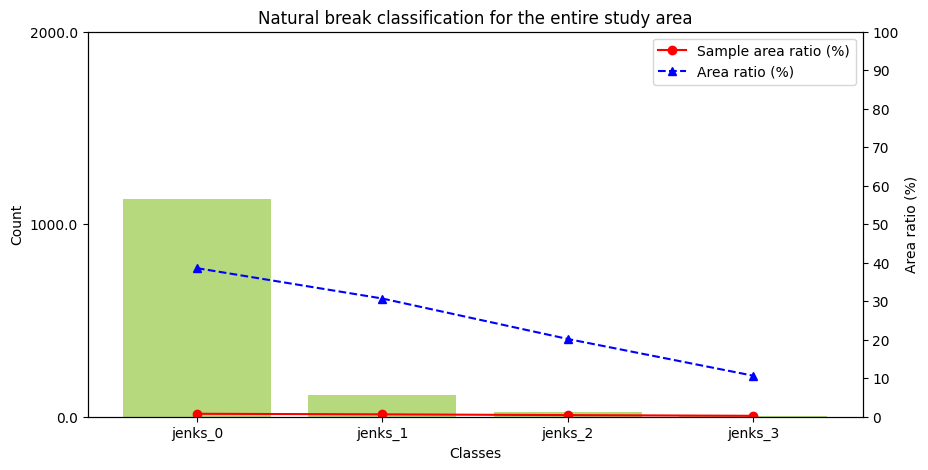

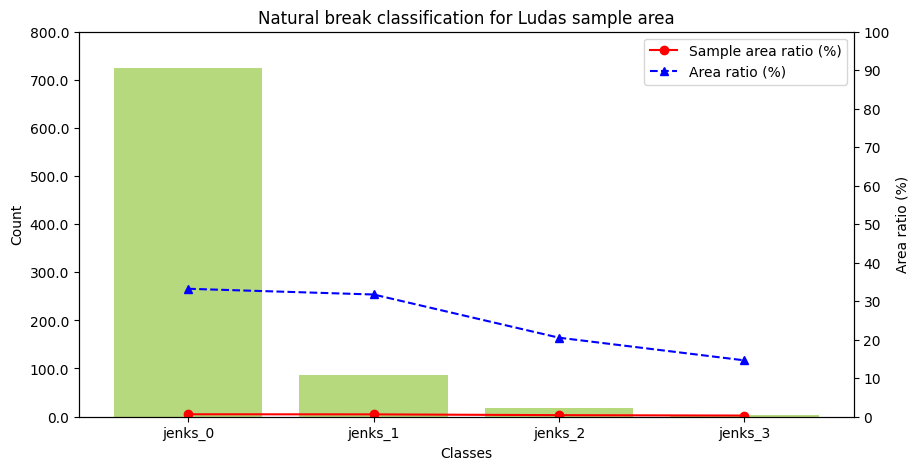

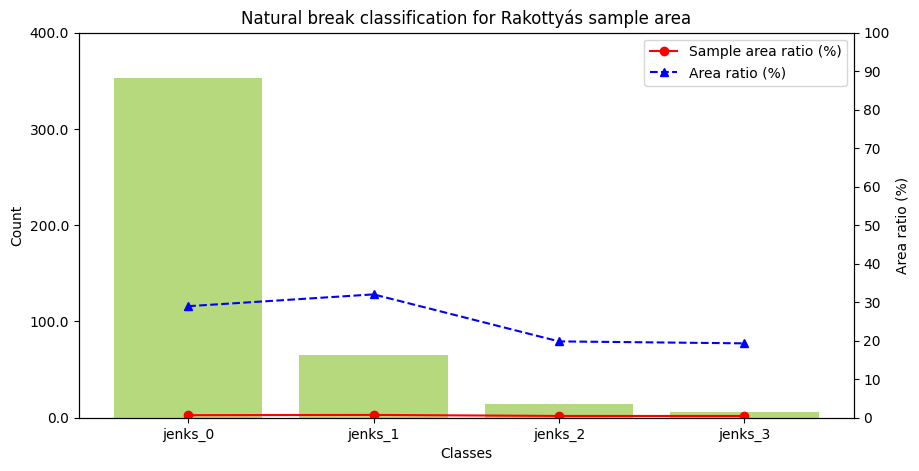

In [17]:
study_area_statistics.create_classification_diagram(
    classification_column_name='jenks',
    sample_area=subpart_areas['sum'],
    path='../results/oleasters_dhte_2023/diagrams/study_area_jenks_diagram.png',
    diagram_title='Natural break classification for the entire study area'
)
ludas_statistics.create_classification_diagram(
    classification_column_name='jenks',
    sample_area=subpart_areas['ludas'],
    path='../results/oleasters_dhte_2023/diagrams/ludas_jenks_diagram.png',
    diagram_title='Natural break classification for Ludas sample area'
)
rakottyas_statistics.create_classification_diagram(
    classification_column_name='jenks',
    sample_area=subpart_areas['rakottyas'],
    path='../results/oleasters_dhte_2023/diagrams/rakottyas_jenks_diagram.png',
    diagram_title='Natural break classification for Rakottyás sample area'
)

# Create pie chart for area distribution in jenks classification

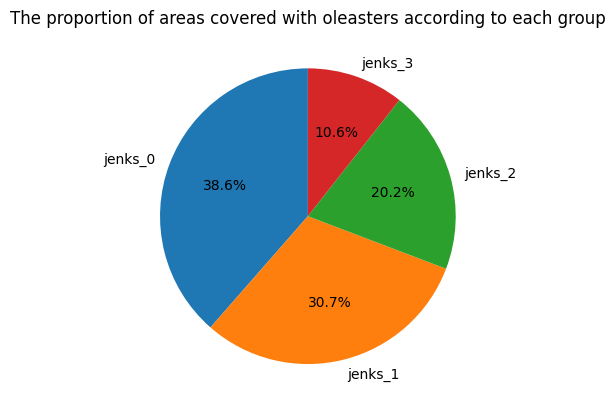

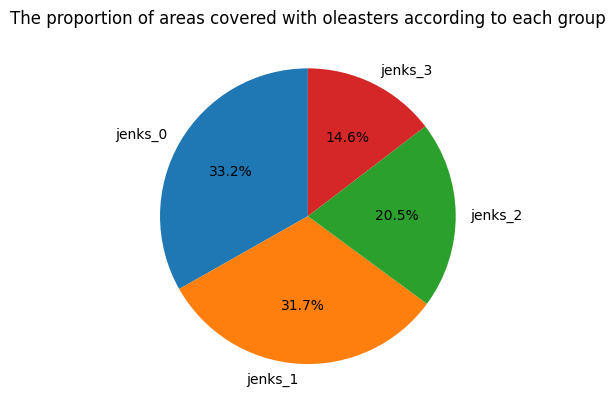

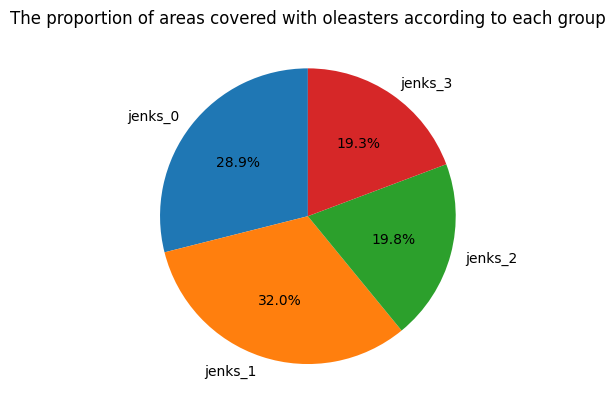

In [18]:
study_area_statistics.create_classification_area_ratio_pie_chart(
    classification_column_name='jenks',
    sample_area=subpart_areas['sum'],
    path='../results/oleasters_dhte_2023/diagrams/study_area_jenks_pie_chart.png'
)
ludas_statistics.create_classification_area_ratio_pie_chart(
    classification_column_name='jenks',
    sample_area=subpart_areas['ludas'],
    path='../results/oleasters_dhte_2023/diagrams/ludas_jenks_pie_chart.png'
)
rakottyas_statistics.create_classification_area_ratio_pie_chart(
    classification_column_name='jenks',
    sample_area=subpart_areas['rakottyas'],
    path='../results/oleasters_dhte_2023/diagrams/rakottyas_jenks_pie_chart.png'
)

## Equal interval classification analysis

In [19]:
study_area_equal_interval_statistics = study_area_statistics.get_classification_area_statistics(
    'equal_interval_breaks',
    'area',
    subpart_areas['sum']
)
ludas_equal_interval_statistics = ludas_statistics.get_classification_area_statistics(
    'equal_interval_breaks',
    'area',
    subpart_areas['ludas']
)
rakottyas_equal_interval_statistics = rakottyas_statistics.get_classification_area_statistics(
    'equal_interval_breaks',
    'area',
    subpart_areas['rakottyas']
)
print('The equal interval classification data for the three areas')
print(study_area_equal_interval_statistics)
print(ludas_equal_interval_statistics)
print(rakottyas_equal_interval_statistics)

The equal interval classification data for the three areas
            classes  count           area  class_average_area  area_ratio  \
0  equal_interval_0   1260  114452.896285           90.835632   82.161955   
1  equal_interval_1      6   10052.014160         1675.335693    7.216009   
2  equal_interval_3      3   14796.662454         4932.220818   10.622035   

   sample_area_ratio  
0           1.552853  
1           0.136382  
2           0.200755  
            classes  count          area  class_average_area  area_ratio  \
0  equal_interval_0    824  79454.542678           96.425416   78.422844   
1  equal_interval_1      4   7064.353350         1766.088337    6.972624   
2  equal_interval_3      3  14796.662454         4932.220818   14.604531   

   sample_area_ratio  
0           1.415496  
1           0.125853  
2           0.263605  
            classes  count          area  class_average_area  area_ratio  \
0  equal_interval_0    420  23890.184147           56.881391   62.8

### Write equal interval statistics to csv

In [20]:
study_area_equal_interval_statistics.to_csv(
    '../results/oleasters_dhte_2023/area_statistics/study_area_equal_interval_statistics.csv',
    index=False
)
ludas_equal_interval_statistics.to_csv(
    '../results/oleasters_dhte_2023/area_statistics/ludas_equal_interval_statistics.csv',
    index=False
)
rakottyas_equal_interval_statistics.to_csv(
    '../results/oleasters_dhte_2023/area_statistics/rakottyas_equal_interval_statistics.csv',
    index=False
)

### Write equal interval statistics to excel

In [21]:
write_excel_sheet_from_dataframe(
    study_area_equal_interval_statistics,
    file_name=excel_file,
    sheet_name='study_area_equal_interval_statistics'
)
write_excel_sheet_from_dataframe(
    ludas_equal_interval_statistics,
    file_name=excel_file,
    sheet_name='ludas_equal_interval_statistics'
)
write_excel_sheet_from_dataframe(
    rakottyas_equal_interval_statistics,
    file_name=excel_file,
    sheet_name='rakottyas_equal_interval_statistics'
)

/Users/aferenc/Documents/delheves/describe_gis_data/venv/lib/python3.11/site-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


### Create diagrams for equal interval statistics

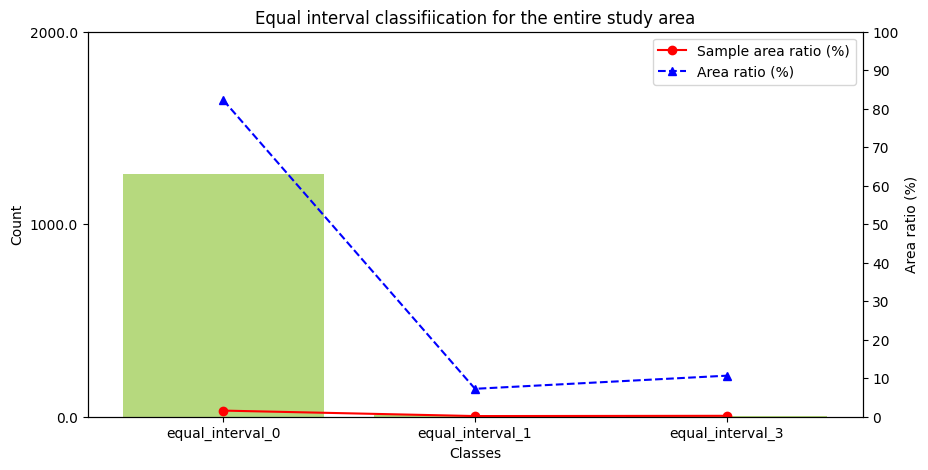

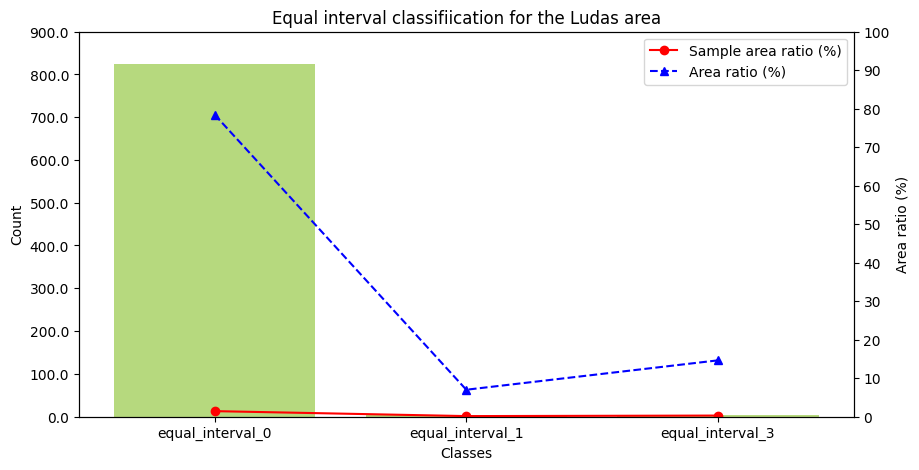

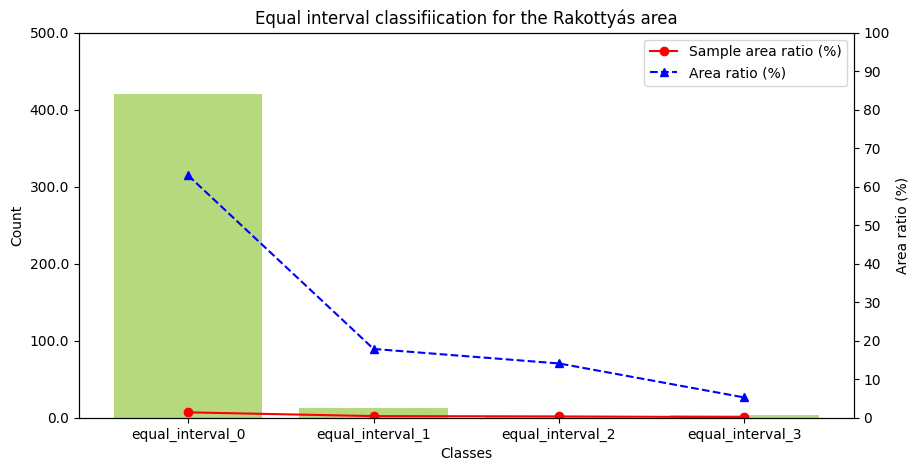

In [22]:
study_area_statistics.create_classification_diagram(
    classification_column_name='equal_interval_breaks',
    sample_area=subpart_areas['sum'],
    path='../results/oleasters_dhte_2023/diagrams/study_area_equal_interval_diagram.png',
    diagram_title='Equal interval classifiication for the entire study area'
)
ludas_statistics.create_classification_diagram(
    classification_column_name='equal_interval_breaks',
    sample_area=subpart_areas['ludas'],
    path='../results/oleasters_dhte_2023/diagrams/ludas_equal_interval_diagram.png',
    diagram_title='Equal interval classifiication for the Ludas area'
)
rakottyas_statistics.create_classification_diagram(
    classification_column_name='equal_interval_breaks',
    sample_area=subpart_areas['rakottyas'],
    path='../results/oleasters_dhte_2023/diagrams/rakottyas_equal_interval_diagram.png',
    diagram_title='Equal interval classifiication for the Rakottyás area'
)

# Create pie chart for area distribution in equal interval classification

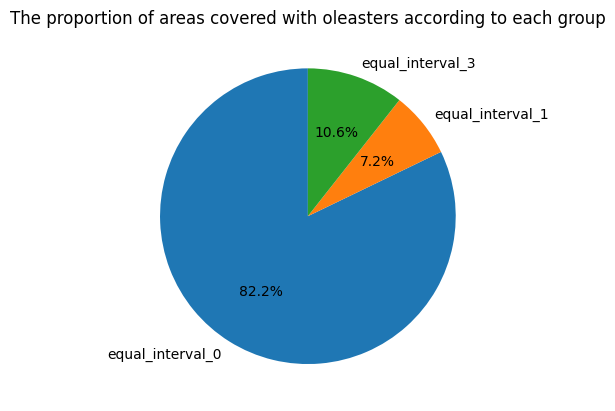

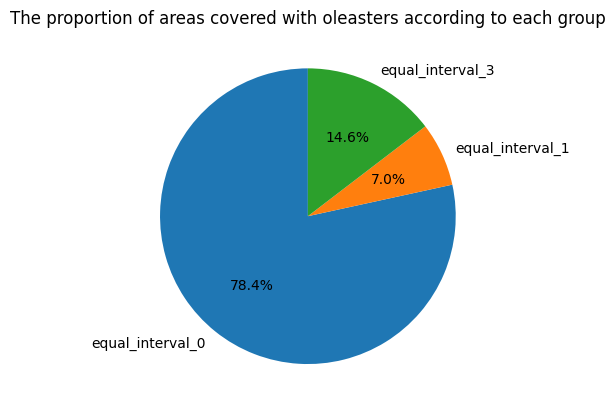

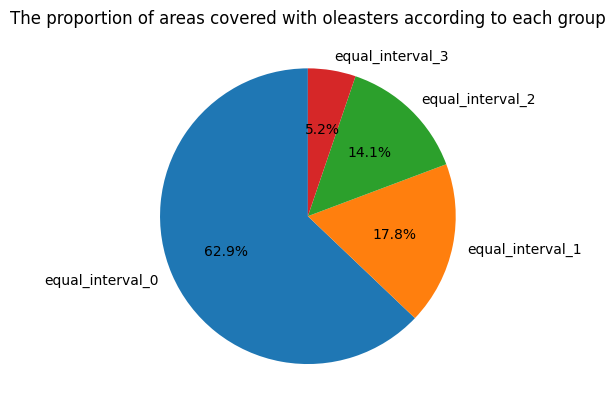

In [23]:
study_area_statistics.create_classification_area_ratio_pie_chart(
    classification_column_name='equal_interval_breaks',
    sample_area=subpart_areas['sum'],
    path='../results/oleasters_dhte_2023/diagrams/study_area_equal_interval_pie_chart.png'
)
ludas_statistics.create_classification_area_ratio_pie_chart(
    classification_column_name='equal_interval_breaks',
    sample_area=subpart_areas['ludas'],
    path='../results/oleasters_dhte_2023/diagrams/ludas_equal_interval_pie_chart.png'
)
rakottyas_statistics.create_classification_area_ratio_pie_chart(
    classification_column_name='equal_interval_breaks',
    sample_area=subpart_areas['rakottyas'],
    path='../results/oleasters_dhte_2023/diagrams/rakottyas_equal_interval_pie_chart.png'
)

## Quartile classification analysis

### Calculate quartile statistics

In [24]:
study_area_quartile_statistics = study_area_statistics.get_classification_area_statistics(
    'quartiles',
    'area',
    subpart_areas['sum']
)
ludas_quartile_statistics = ludas_statistics.get_classification_area_statistics(
    'quartiles',
    'area',
    subpart_areas['ludas']
)
rakottyas_quartile_statistics = rakottyas_statistics.get_classification_area_statistics(
    'quartiles',
    'area',
    subpart_areas['rakottyas']
)
print('The quartile classification data for the three areas')
print(study_area_quartile_statistics)
print(ludas_quartile_statistics)
print(rakottyas_quartile_statistics)

The quartile classification data for the three areas
      classes  count           area  class_average_area  area_ratio  \
0  quartile_0    318    2108.476408            6.630429    1.513606   
1  quartile_1    317    7639.984734           24.100898    5.484493   
3  quartile_2    317  110492.155651          348.555696   79.318671   
2  quartile_3    317   19060.956106           60.129199   13.683231   

   sample_area_ratio  
0           0.028607  
1           0.103656  
3           1.499116  
2           0.258612  
      classes  count          area  class_average_area  area_ratio  \
0  quartile_0    208   1703.764043            8.191173    1.681641   
1  quartile_1    208   5411.720974           26.017889    5.341451   
3  quartile_2    207  81169.546816          390.238206   80.115580   
2  quartile_3    208  13030.526649           62.949404   12.861328   

   sample_area_ratio  
0           0.030353  
1           0.096411  
3           1.446049  
2           0.232141  
      clas

### Write quartile statistics to csv

In [25]:
study_area_quartile_statistics.to_csv(
    '../results/oleasters_dhte_2023/area_statistics/study_area_quartile_statistics.csv',
    index=False
)
ludas_quartile_statistics.to_csv(
    '../results/oleasters_dhte_2023/area_statistics/ludas_quartile_statistics.csv',
    index=False
)
rakottyas_quartile_statistics.to_csv(
    '../results/oleasters_dhte_2023/area_statistics/rakottyas_quartile_statistics.csv',
    index=False
)

### Write quartile statistics to excel

In [26]:
write_excel_sheet_from_dataframe(
    study_area_quartile_statistics,
    file_name=excel_file,
    sheet_name='study_area_quartile_statistics'
)
write_excel_sheet_from_dataframe(
    ludas_quartile_statistics,
    file_name=excel_file,
    sheet_name='ludas_quartile_statistics'
)
write_excel_sheet_from_dataframe(
    rakottyas_quartile_statistics,
    file_name=excel_file,
    sheet_name='rakottyas_quartile_statistics'
)

/Users/aferenc/Documents/delheves/describe_gis_data/venv/lib/python3.11/site-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


## Create diagrams for quartile statistics

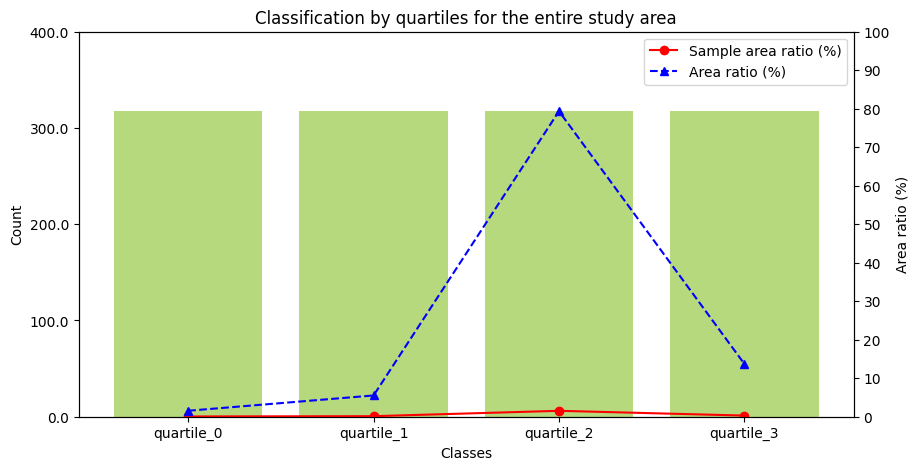

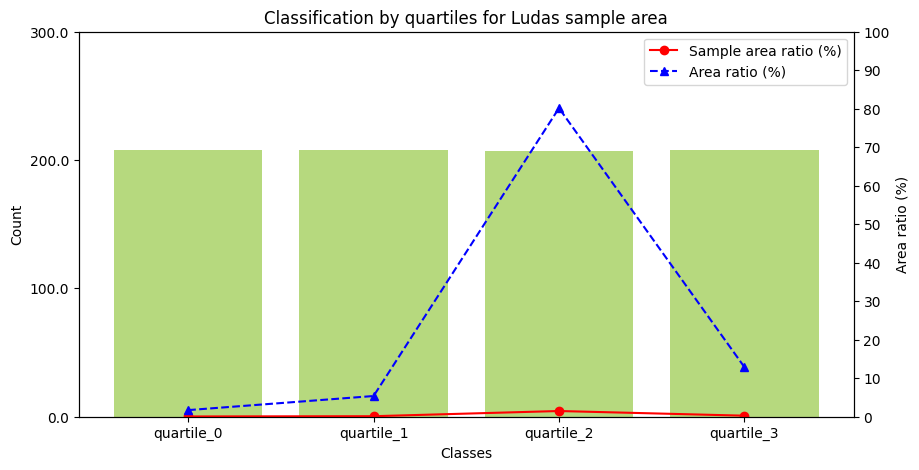

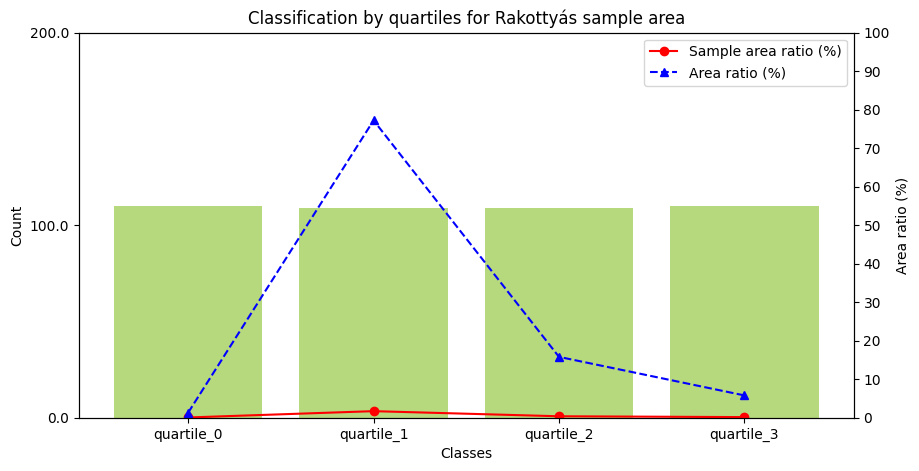

In [27]:
study_area_statistics.create_classification_diagram(
    classification_column_name='quartiles',
    sample_area=subpart_areas['sum'],
    path='../results/oleasters_dhte_2023/diagrams/study_area_quartile_statistics.png',
    diagram_title='Classification by quartiles for the entire study area'
)
ludas_statistics.create_classification_diagram(
    classification_column_name='quartiles',
    sample_area=subpart_areas['ludas'],
    path='../results/oleasters_dhte_2023/diagrams/ludas_quartile_statistics.png',
    diagram_title='Classification by quartiles for Ludas sample area'
)
rakottyas_statistics.create_classification_diagram(
    classification_column_name='quartiles',
    sample_area=subpart_areas['rakottyas'],
    path='../results/oleasters_dhte_2023/diagrams/rakottyas_quartile_statistics.png',
    diagram_title='Classification by quartiles for Rakottyás sample area'
)

# Create pie chart for area distribution based on quartiles

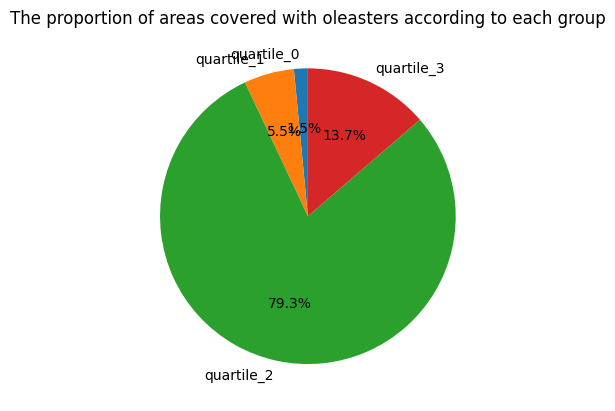

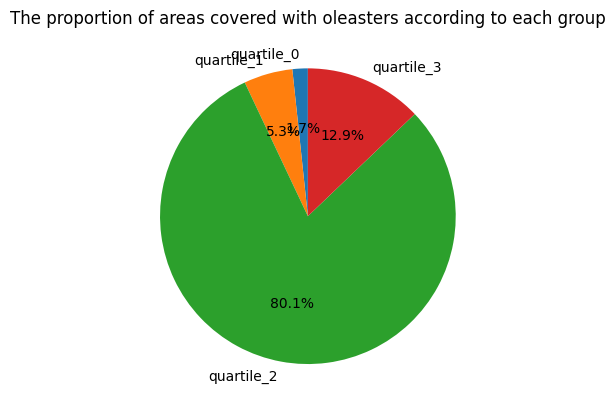

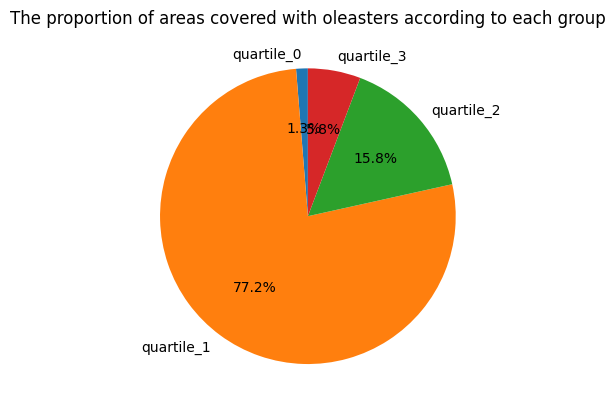

In [28]:
study_area_statistics.create_classification_area_ratio_pie_chart(
    classification_column_name='quartiles',
    sample_area=subpart_areas['sum'],
    path='../results/oleasters_dhte_2023/diagrams/study_area_quartile_pie_chart.png'
)
ludas_statistics.create_classification_area_ratio_pie_chart(
    classification_column_name='quartiles',
    sample_area=subpart_areas['ludas'],
    path='../results/oleasters_dhte_2023/diagrams/ludas_quartile_pie_chart.png'
)
rakottyas_statistics.create_classification_area_ratio_pie_chart(
    classification_column_name='quartiles',
    sample_area=subpart_areas['rakottyas'],
    path='../results/oleasters_dhte_2023/diagrams/rakottyas_quartile_pie_chart.png'
)
